In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from palmerpenguins import load_penguins
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc,roc_auc_score
import plotnine as pt

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [286]:
# Code Here
penguins = load_penguins()
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [287]:
# Finding X and y
from sklearn.preprocessing import LabelEncoder

X = penguins.drop("species", axis = 1)
# Ensure target is treated as categorical

y = penguins["species"]
y = y.astype('category')  
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# KNN Model with K=3
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm", "body_mass_g","bill_depth_mm"])
  ],
  remainder = "drop"
)


knn_3_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

knn1 = knn_3_pipeline.fit(X, y)

y_train_pred = knn1.predict(X_train)
y_test_pred = knn1.predict(X_test)


# Calculate MSE for training and testing data
train_mse1 = mean_squared_error(y_train, y_train_pred)
test_mse1 = mean_squared_error(y_test, y_test_pred)
r1 = r2_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Compute Overall Accuracy
overall_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

# Compute Precision, Recall, and F1-Score for each class
class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)

# Access precision, recall, and F1-score for each class
for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  # Ensure it's a class, not 'accuracy' or 'macro avg'
        precision = metrics['precision']
        recall = metrics['recall']
        f1_score = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1_score:.4f}")


Confusion Matrix:
 [[44  0  0]
 [ 0 18  0]
 [ 0  0 22]]

Overall Accuracy: 1.0000

Class: Adelie
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Chinstrap
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


In [ ]:
# KNN Model with K=5
knn_5_pipeline = Pipeline([
    ('preprocessor', ct),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn2 = knn_5_pipeline.fit(X, y)

y_train_pred = knn1.predict(X_train)
y_test_pred = knn1.predict(X_test)


# Calculate MSE for training and testing data
train_mse2 = mean_squared_error(y_train, y_train_pred)
test_mse2 = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

conf_matrix2 = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix2)

# Compute Overall Accuracy
overall_accuracy2 = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy2:.4f}")

# Compute Precision, Recall, and F1-Score for each class
class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)
# Access precision, recall, and F1-score for each class
for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  # Ensure it's a class, not 'accuracy' or 'macro avg'
        precision2 = metrics['precision']
        recall2 = metrics['recall']
        f1_score2 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision2:.4f}")
        print(f"  Recall: {recall2:.4f}")
        print(f"  F1-Score: {f1_score2:.4f}")


Confusion Matrix:
 [[44  0  0]
 [ 0 18  0]
 [ 0  0 22]]

Overall Accuracy: 1.0000

Class: Adelie
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Chinstrap
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class: Gentoo
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000


In [ ]:
#Decision tree max depth = 3
decision_tree_pipeline = Pipeline([
    ('preprocessor', ct),
    ('decision_tree', DecisionTreeClassifier(max_depth=3))
])

# Fit the pipeline
dt_model = decision_tree_pipeline.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate MSE for training and testing data
train_mse_dt = mean_squared_error(y_train, y_train_pred)
test_mse_dt = mean_squared_error(y_test, y_test_pred)
r2_dt = r2_score(y_test, y_test_pred)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix_dt)

# Overall accuracy
overall_accuracy_dt = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy_dt:.4f}")


# Compute Precision, Recall, and F1-Score for each class
class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)
# Access precision, recall, and F1-score for each class
for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  # Ensure it's a class, not 'accuracy' or 'macro avg'
        precision3 = metrics['precision']
        recall3 = metrics['recall']
        f1_score3 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision3:.4f}")
        print(f"  Recall: {recall3:.4f}")
        print(f"  F1-Score: {f1_score3:.4f}")


Confusion Matrix:
 [[43  1  0]
 [ 2 16  0]
 [ 0  1 21]]

Overall Accuracy: 0.9524

Class: Adelie
  Precision: 0.9556
  Recall: 0.9773
  F1-Score: 0.9663

Class: Chinstrap
  Precision: 0.8889
  Recall: 0.8889
  F1-Score: 0.8889

Class: Gentoo
  Precision: 1.0000
  Recall: 0.9545
  F1-Score: 0.9767


In [ ]:
# Decision tree max of 10 
decision_tree_pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('decision_tree', DecisionTreeClassifier(max_depth=10))
])

# Fit the pipeline
dt_model2 = decision_tree_pipeline2.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model2.predict(X_train)
y_test_pred = dt_model2.predict(X_test)

# Calculate MSE for training and testing data
train_mse_dt2 = mean_squared_error(y_train, y_train_pred)
test_mse_dt2 = mean_squared_error(y_test, y_test_pred)
r2_dt2 = r2_score(y_test, y_test_pred)

# Confusion matrix
conf_matrix_dt2 = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix_dt2)

# Overall accuracy
overall_accuracy_dt2 = accuracy_score(y_test, y_test_pred)
print(f"\nOverall Accuracy: {overall_accuracy_dt2:.4f}")


# Compute Precision, Recall, and F1-Score for each class
class_report_dict = classification_report(
    y_test,
    y_test_pred,
    target_names=label_encoder.classes_,
    output_dict=True
)
# Access precision, recall, and F1-score for each class
for class_name, metrics in class_report_dict.items():
    if class_name in label_encoder.classes_:  
        precision4 = metrics['precision']
        recall4 = metrics['recall']
        f1_score4 = metrics['f1-score']
        print(f"\nClass: {class_name}")
        print(f"  Precision: {precision4:.4f}")
        print(f"  Recall: {recall4:.4f}")
        print(f"  F1-Score: {f1_score4:.4f}")


Confusion Matrix:
 [[43  0  1]
 [ 2 16  0]
 [ 1  0 21]]

Overall Accuracy: 0.9524

Class: Adelie
  Precision: 0.9348
  Recall: 0.9773
  F1-Score: 0.9556

Class: Chinstrap
  Precision: 1.0000
  Recall: 0.8889
  F1-Score: 0.9412

Class: Gentoo
  Precision: 0.9545
  Recall: 0.9545
  F1-Score: 0.9545


In [292]:
fit_results1 = pd.DataFrame({
    "Model": ["KNN (K=3)", "KNN (K=5)", "Decision Tree (Max=3)","Decision Tree (Max=10)"],
    "Confusion Matrix": [conf_matrix,conf_matrix2, conf_matrix_dt, conf_matrix_dt2],
    "Accuracy": [overall_accuracy,overall_accuracy2,overall_accuracy_dt,overall_accuracy_dt2],
    "Precision": [precision,precision2,precision3,precision4],
    "Recall": [recall,recall2,recall3,recall4],
    "F1-Score": [f1_score,f1_score2,f1_score3,f1_score4]
})

fit_results1

,Model,Confusion Matrix,Accuracy,Precision,Recall,F1-Score
0,KNN (K=3),"[[44, 0, 0], [0, 18, 0], [0, 0, 22]]",1.000000,1.000000,1.000000,1.000000
1,KNN (K=5),"[[44, 0, 0], [0, 18, 0], [0, 0, 22]]",1.000000,1.000000,1.000000,1.000000
2,Decision Tree (Max=3),"[[43, 1, 0], [2, 16, 0], [0, 1, 21]]",0.952381,1.000000,0.954545,0.976744
3,Decision Tree (Max=10),"[[43, 0, 1], [2, 16, 0], [1, 0, 21]]",0.952381,0.954545,0.954545,0.954545


Here, we can see the KNN models are generally better for identifying predictions, as these didn't come out with any errors.

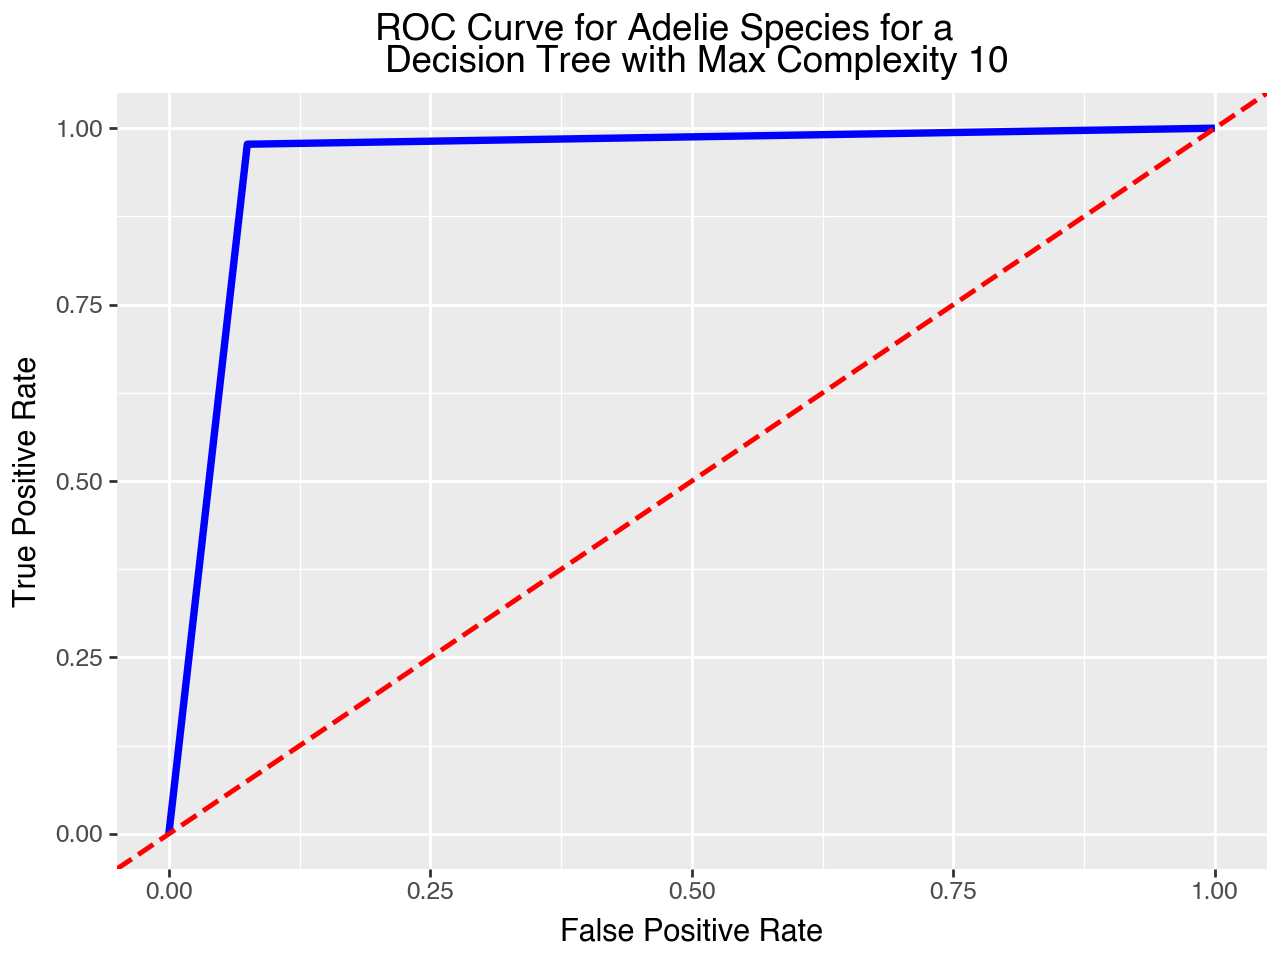

In [303]:
# Choose a species to plot the ROC curve for
species_index = 0  # Index of the species in label_encoder.classes_

# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

# Extract true values and predicted probabilities for the selected species
y_test_species = y_test_bin[:, species_index]
y_test_pred_prob_dt2 = decision_tree_pipeline2.predict_proba(X_test)

y_test_pred_prob_species = y_test_pred_prob_dt2[:, species_index]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_species, y_test_pred_prob_species)
roc_auc = auc(fpr, tpr)

# Create a DataFrame for plotting
roc_data = pd.DataFrame({
    "FPR": fpr,
    "TPR": tpr
})

# Plot the ROC curve with plotnine
(pt.ggplot(roc_data, pt.aes(x="FPR", y="TPR")) +
    pt.geom_line(color="blue", size=1.5) +
    pt.geom_abline(slope=1, intercept=0, color="red", linetype="dashed", size=1) +
    pt.labs(
        title="ROC Curve for Adelie Species for a \n Decision Tree with Max Complexity 10",
        x="False Positive Rate",
        y="True Positive Rate"
    ) 
)

This tells us that our last model, the Decision Tree with a max complexity of 10 was well above a baseline model. It was very accurate an successful in picking whether a penguin was an Adelie or not.

ChatGPT-4o was used to figure out the workflow and syntax of some of these new functions in a pipeline format.